In [1]:
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from tensorflow import keras
import seaborn as sns
import random
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [2]:
def find_max_wave_height(zdisp_window):
    zero_crossings = np.where(np.diff(np.sign(zdisp_window)))[0]
    zero_crossings= np.append(zero_crossings, len(zdisp_window)-1);
    zero_crossings= np.append(-1,zero_crossings)
    h_wave=np.zeros(len(zero_crossings)-1)
    t_wave=np.zeros(len(zero_crossings)-1)
            
    for iter_zero_crossing in range(len(zero_crossings)-1):
        peak_idx=np.argmax(np.abs(zdisp_window[zero_crossings[iter_zero_crossing]+1:zero_crossings[iter_zero_crossing+1]+1]))
        h_wave[iter_zero_crossing]=zdisp_window[zero_crossings[iter_zero_crossing]+1+peak_idx]
        t_wave[iter_zero_crossing]=zero_crossings[iter_zero_crossing]+1+peak_idx
                
    max_wave_height=max(np.abs(np.diff(h_wave)))
    max_index = int(t_wave[np.argmax(np.abs(np.diff(h_wave)))])
    
    return max_wave_height, max_index

In [4]:
root_folder_rw = os.getcwd()+"/wave_height_g_2p2"
root_folder_norw = os.getcwd()+"/wave_height_g_2p2"

#root_folder="E:/"

window_start_min_rel_to_rw=-25
window_length_in_min=20

samplerate=1.28

rw_idx=round(25*60*samplerate)
start_idx=round((25+window_start_min_rel_to_rw)*60*samplerate)
end_idx=start_idx+round(window_length_in_min*60*samplerate)

rw_dir=root_folder_rw + '/rw_samples'
z_disp_rw=[] 
#z_disp_rw_buoy_067=[] 
for folder in os.listdir(rw_dir):
    print("Processing: " + folder)
        
    start_time = time.time()      
    for file in os.listdir(rw_dir+ "/" + folder):
        if file.endswith(".npz"):
            data=np.load(rw_dir+"/"+ folder+"/"+file)
            z_tmp=data['zdisp'][start_idx:end_idx]
            #print(z_tmp.shape)
            significant_wave_height=4*np.std(data['zdisp'])#[start_idx:-1]
            #if folder=='Buoy_067':
            #    z_disp_rw_buoy_067.append(z_tmp/significant_wave_height)
            #else:
#            z_disp_rw.append(z_tmp/significant_wave_height) 
            z_disp_rw.append(z_tmp/significant_wave_height)
    #         if (len(z_disp_rw) > 50):
    #             break
    #     else:
    #         continue
    #     break
    # else:
    #     continue
    # break
    
    print("--- %s seconds ---" % (time.time() - start_time))
    
z_disp_norw=[]
#z_disp_norw_buoy_067=[]
norw_dir=root_folder_norw + '/norw_samples'
#norw_dir=root_folder_norw 
end_idx=end_idx-start_idx

for folder in os.listdir(norw_dir):
    print("Processing: " + folder)
    start_time = time.time()
  
    for file in os.listdir(norw_dir+ "/" + folder):
        if file.endswith(".npz"):
            data=np.load(norw_dir+"/"+ folder+"/"+file)
            z_tmp=data['zdisp_norw'][0:end_idx]
            #print(z_tmp.shape)
            significant_wave_height=4*np.std(data['zdisp_norw'])
            #if folder=='Buoy_067':
            #    z_disp_norw_buoy_067.append(z_tmp/significant_wave_height)
            #else:
#            z_disp_norw.append(z_tmp/significant_wave_height)#/significant_wave_height
            z_disp_norw.append(z_tmp/significant_wave_height)
    
    #         if (len(z_disp_norw) > 50):
    #             break
    #     else: 
    #         continue
    #     break
    # else:
    #     continue
    # break

                     
    print("--- %s seconds ---" % (time.time() - start_time))

Processing: Buoy_028
--- 0.4491143226623535 seconds ---
Processing: Buoy_029
--- 0.8589794635772705 seconds ---
Processing: Buoy_036
--- 0.8828608989715576 seconds ---
Processing: Buoy_043
--- 0.24016404151916504 seconds ---
Processing: Buoy_045
--- 0.5264227390289307 seconds ---
Processing: Buoy_067
--- 0.5999541282653809 seconds ---
Processing: Buoy_071
--- 0.6165330410003662 seconds ---
Processing: Buoy_076
--- 0.6505954265594482 seconds ---
Processing: Buoy_081
--- 0.0 seconds ---
Processing: Buoy_087
--- 0.0 seconds ---
Processing: Buoy_088
--- 0.0 seconds ---
Processing: Buoy_089
--- 0.0 seconds ---
Processing: Buoy_090
--- 0.0 seconds ---
Processing: Buoy_091
--- 0.06595206260681152 seconds ---
Processing: Buoy_092
--- 1.1827335357666016 seconds ---
Processing: Buoy_093
--- 1.1332321166992188 seconds ---
Processing: Buoy_094
--- 2.494854688644409 seconds ---
Processing: Buoy_095
--- 0.4878847599029541 seconds ---
Processing: Buoy_096
--- 1.4160435199737549 seconds ---
Processing

In [5]:
z_disp_rw=np.vstack(z_disp_rw)
#z_disp_rw_buoy_067=np.vstack(z_disp_rw_buoy_067)
print(z_disp_rw.shape)

z_disp_norw=np.vstack(z_disp_norw)
#z_disp_norw_buoy_067=np.vstack(z_disp_norw_buoy_067)

print(z_disp_norw.shape)

(18635, 1536)
(18635, 1536)


In [6]:
possible_total_waves = round(z_disp_rw.shape[0] + z_disp_norw.shape[0])
print(f"Total possible waves in our study: {possible_total_waves}")

Total possible waves in our study: 37270


The number of rogue wave samples in the case with relative rogue wave ratio 0.2 is 4659.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.2 is 18635.
The total number of wave samples in the case with relative rogue wave ratio 0.2 is 23294.
(4659, 1536)
(18635, 1536)


5012
12105
13280


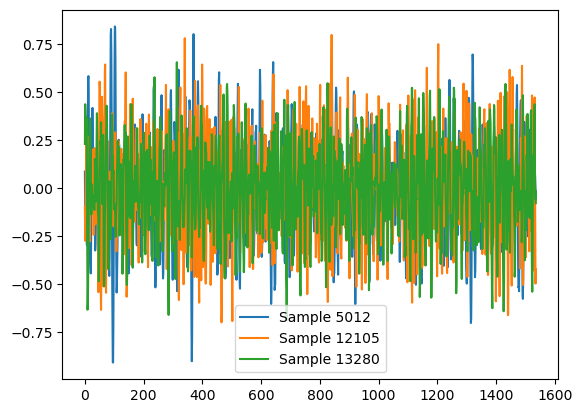

The number of rogue wave samples in the case with relative rogue wave ratio 0.3 is 7986.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.3 is 18635.
The total number of wave samples in the case with relative rogue wave ratio 0.3 is 26621.
(7986, 1536)
(18635, 1536)


12299
6636
2402


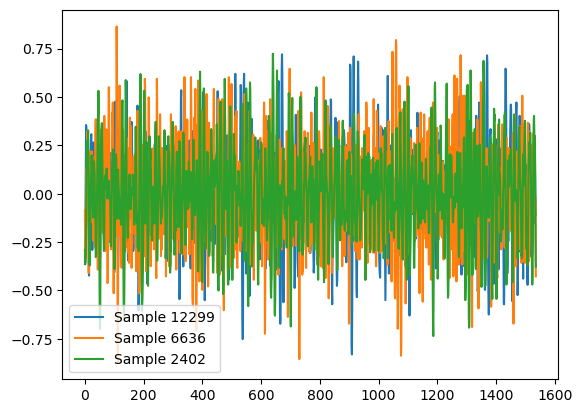

The number of rogue wave samples in the case with relative rogue wave ratio 0.4 is 12423.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.4 is 18635.
The total number of wave samples in the case with relative rogue wave ratio 0.4 is 31058.
(12423, 1536)
(18635, 1536)


13885
12881
9345


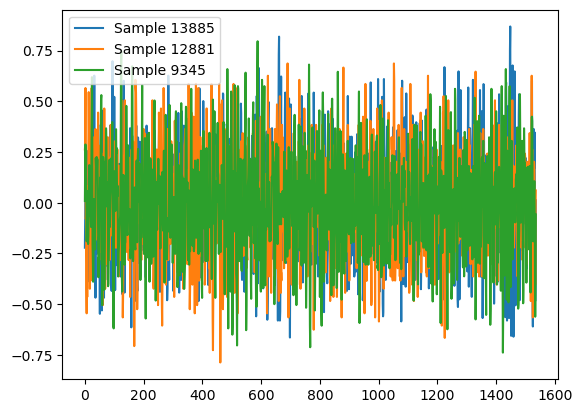

The number of rogue wave samples in the case with relative rogue wave ratio 0.5 is 18635.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.5 is 18635.
The total number of wave samples in the case with relative rogue wave ratio 0.5 is 37270.
(18635, 1536)
(18635, 1536)


3246
11483
14483


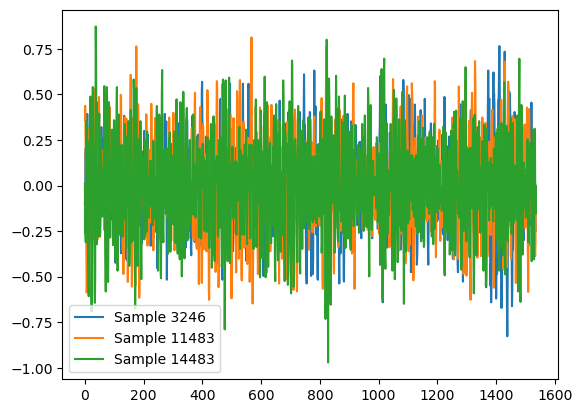

The number of rogue wave samples in the case with relative rogue wave ratio 0.6 is 18635.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.6 is 12423.
The total number of wave samples in the case with relative rogue wave ratio 0.6 is 31058.
(18635, 1536)
(12423, 1536)


5640
6437
8931


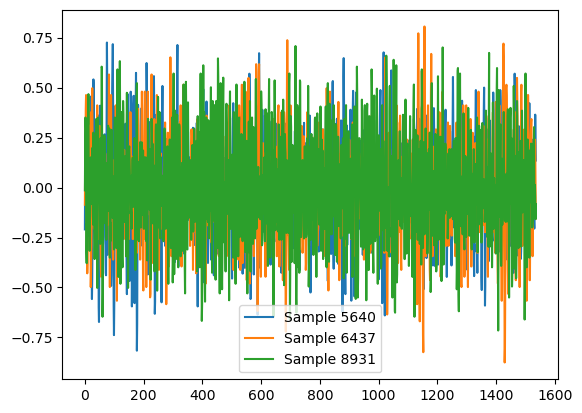

The number of rogue wave samples in the case with relative rogue wave ratio 0.7 is 18635.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.7 is 7986.
The total number of wave samples in the case with relative rogue wave ratio 0.7 is 26621.
(18635, 1536)
(7986, 1536)


1620
11806
13676


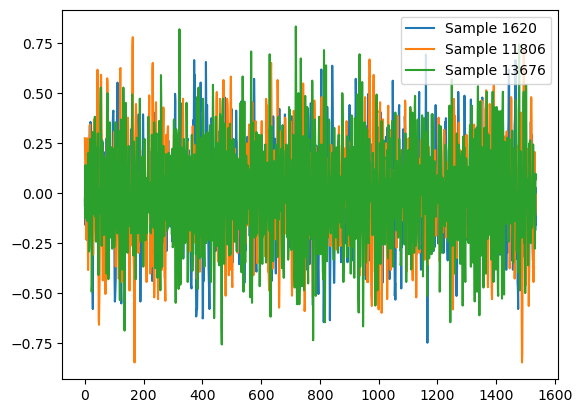

The number of rogue wave samples in the case with relative rogue wave ratio 0.8 is 18635.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.8 is 4659.
The total number of wave samples in the case with relative rogue wave ratio 0.8 is 23294.
(18635, 1536)
(4659, 1536)


2304
4722
17216


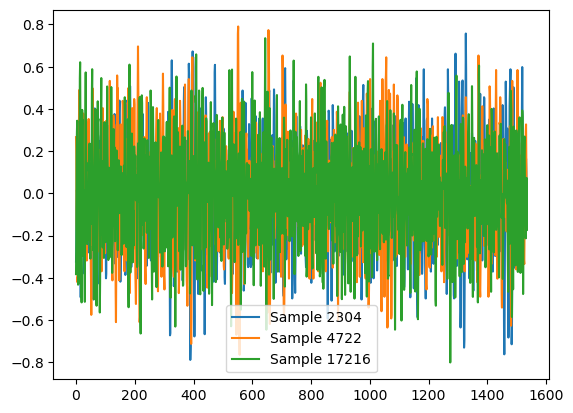

In [7]:
N_data=min([z_disp_rw.shape[0],z_disp_norw.shape[0]])#-1#-110001  #-1
relative_rw = [0.2, 0.3, 0.4, 0.5, 0.6 ,0.7, 0.8]

for i in range(len(relative_rw)):
    ratio = relative_rw[i]
    if ratio >= 0.5:
        num_rw = z_disp_rw.shape[0]
        num_norw = round(((1-ratio)/ratio) * num_rw)
    else:
        num_norw = z_disp_norw.shape[0]
        num_rw = round((ratio / (1-ratio))*num_norw)

    print(f"The number of rogue wave samples in the case with relative rogue wave ratio {ratio} is {num_rw}.")
    print(f"The number of non-rogue wave samples in the case with relative rogue wave ratio {ratio} is {num_norw}.")
    print(f"The total number of wave samples in the case with relative rogue wave ratio {ratio} is {num_rw + num_norw}.", end='\n') 
        
    z_disp_rw_altered = z_disp_rw[0:num_rw]
    z_disp_norw_altered = z_disp_norw[0:num_norw]
    
    print(z_disp_rw_altered.shape)
    print(z_disp_norw_altered.shape)
    print('\n')

    N_plots=3
    selected_samples=random.sample(range(0, len(z_disp_rw)), N_plots)

    plt.figure()
    for iter_plot in selected_samples:
        print(iter_plot)
        plt.plot(z_disp_rw[iter_plot,:], label='Sample '+str(iter_plot))

    plt.legend(loc='best')    
    plt.show()
    plt.close()

    wave_data=np.concatenate((z_disp_rw_altered, z_disp_norw_altered), axis=0)
    labels=np.concatenate(( np.ones(len(z_disp_rw_altered)) , np.zeros(len(z_disp_norw_altered))),axis=0)

    #wave_data_buoy_067=np.concatenate((z_disp_rw_buoy_067, z_disp_norw_buoy_067), axis=0)
    #labels_067=np.concatenate(( np.ones(len(z_disp_rw_buoy_067)) , np.zeros(len(z_disp_norw_buoy_067))),axis=0)

    idx = np.random.permutation(len(wave_data))
    wave_data = wave_data[idx]
    labels=labels[idx]


    wave_data_train=wave_data[0:round(0.8*len(wave_data))]
    wave_data_test=wave_data[round(0.8*len(wave_data))+1:]                                      

    label_train=labels[0:round(0.8*len(wave_data))]
    label_test=labels[round(0.8*len(wave_data))+1:]


    wave_data_train = wave_data_train.reshape((wave_data_train.shape[0], wave_data_train.shape[1], 1))
    wave_data_test = wave_data_test.reshape((wave_data_test.shape[0], wave_data_test.shape[1], 1))

    num_classes=2

    np.savez(os.getcwd()  +f'/DataPrepared/RWs_H_g_2p2_tadv_5min_rw_{ratio}',wave_data_train=wave_data_train, wave_data_test=wave_data_test,label_train=label_train,label_test=label_test)